[Brittany_Schwan](https://www.youtube.com/watch?v=Q9dAaw_bJ-o)
[Statistical_Computing_with_R](https://books.google.co.kr/books/about/Statistical_Computing_with_R.html?id=BaHhdqOugjsC&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false)

In [5]:
%matplotlib inline

### Computation of $\int_0^1\frac{\log(x^2+1)}{x+2}dx$ using Monte Carlo
$$\begin{array}{lll}
\mathbb{E}_{X\sim p}g(X)
&=&\int_{-\infty}^\infty g(x)p(x)dx\\
&\approx&\frac{1}{n}\sum_{i=1}^n g(x_i)\quad\mbox{for $x_i\sim p$}
\end{array}$$
where
$$
p(x)=1(0<x<1)
$$

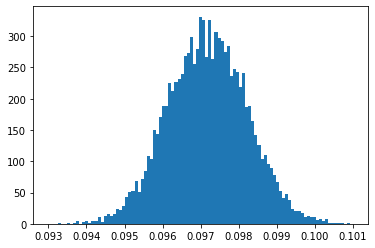

mean of mc: 0.0971806017906307
std of mc: 0.0010408750092465145


In [2]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(x**2+1) / (x+2)


n = 5000 # number of samples to estimate integral
n_MC = 10000 # number of MC estimate integral 

x = np.random.uniform(0., 1., (n_MC, n))
MC = np.mean(g(x), axis=1) 

bins = np.linspace(0.093,0.101,100)
plt.hist(MC, bins=bins)
plt.show()

print('mean of mc: {}'.format(np.mean(MC)))
print('std of mc: {}'.format(np.std(MC)))

### Computation of $\int_0^1\frac{\log(x^2+1)}{x+2}dx$ using control variate
$$\begin{array}{lll}
\mathbb{E}_{X\sim p}g(X)
&=&\mathbb{E}_{X\sim p}\left(g(X)+c(f(X)-\mu)\right)\\
&\approx&\frac{1}{n}\sum_{i=1}^n g(x_i)+c(f(x_i)-\mu)\quad\mbox{for $x_i\sim p$}
\end{array}$$
where $c$ is a fixed constant and
$$
\mu=\mathbb{E}_{X\sim p}f(X)
$$
The optimal $c$ is denoted by $c^*$ where
$$c^*=-\frac{Cov(g(X),f(X))}{Var(f(X))}$$
With this $c^*$,
$$
\mbox{Var}_{X\sim p}\left(g(X)+c^*(f(X)-\mu)\right)
=
\mbox{Var}_{X\sim p}\left(g(X)\right)
-\frac{Cov(g(X),f(X))^2}{Var(f(X))}
$$

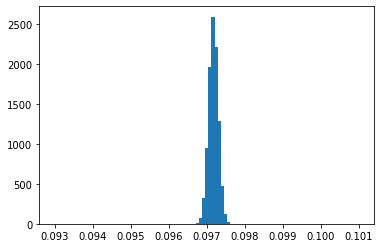

mean of mc: 0.09717487443952101
std of mc: 0.00012269121130309185


In [6]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(x**2+1) / (x+2)


def f(x):
    return x

mu = 0.5

" choice of c "
n = 5000 # number of samples to estimate integral
x = np.random.uniform(0., 1., (n,))
gx = g(x)
fx = f(x)
c = - np.cov(gx,fx)[0,1] / np.cov(gx,fx)[1,1]
    
" control variates "
n = 5000 # number of samples to estimate integral
n_MC = 10000 # number of MC estimate integral 

x = np.random.uniform(0., 1., (n_MC, n))
theta = g(x) + c*(f(x)-mu)
MC = np.mean(theta, axis=1) 

bins = np.linspace(0.093,0.101,100)
plt.hist(MC, bins=bins)
plt.show()

print('mean of mc: {}'.format(np.mean(MC)))
print('std of mc: {}'.format(np.std(MC)))

### How to choose $f(X)$

- High correlation $Corr(f(X),g(X))$ is good

- Simple and Easy to compute $\mu=\mathbb{E}f(X)$

In [7]:
import numpy as np
import matplotlib.pyplot as plt


def g(x):
    return np.log(x**2+1) / (x+2)


def f(x):
    return x

mu = 0.5

" choice of c "
n = 5000 # number of samples to estimate integral
x = np.random.uniform(0., 1., (n,))
gx = g(x)
fx = f(x)
rho = np.corrcoef(gx,fx)
print(rho[0,1]) # 0.90627887: high correlation is good

0.9928848454851185


<div align="center"><img src="img/Screen Shot 2019-08-30 at 8.01.15 AM.png" width="100%" height="30%"></div>

[Statistical_Computing_with_R](https://books.google.co.kr/books/about/Statistical_Computing_with_R.html?id=BaHhdqOugjsC&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false)